<a href="https://colab.research.google.com/github/NaveenkumarMD/Machine-learning-lab/blob/main/FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.pop("model")
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
c=calculate_bartlett_sphericity(df)
d,f=calculate_kmo(df)
print(c)
print(f)

(417.2663803557158, 3.9334914487733104e-57)
0.8172608566882739


In [ ]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa=FactorAnalyzer()
fa.fit(df)
ev,_=fa.get_eigenvalues()
ev

array([6.60840025, 2.65046789, 0.62719727, 0.26959744, 0.2234511 ,
       0.21159612, 0.13526199, 0.12290143, 0.07704665, 0.05203544,
       0.02204441])

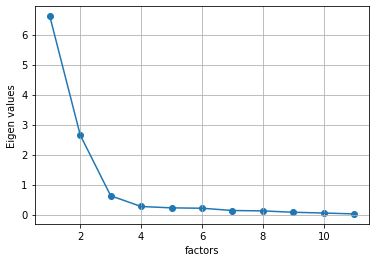

In [ ]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.xlabel("factors")
plt.ylabel("Eigen values")
plt.grid()
plt.show()

In [ ]:
fa1=FactorAnalyzer(3)
fa1.fit(df)
factors=pd.DataFrame(fa1.loadings_,index=list(df.columns),columns=["Factor 1","Factor 2","Facctor 3"])
print(factors)

      Factor 1  Factor 2  Facctor 3
mpg   0.561895  0.135993  -0.431021
cyl  -0.513965 -0.589215   0.067651
disp -0.638781 -0.362351   0.133165
hp   -0.110882 -0.444474   0.503407
drat  0.834206  0.127297   0.112586
wt   -0.730508  0.130533   0.470534
qsec -0.402070  1.064051  -0.013105
vs    0.132608  0.805291  -0.013814
am    0.986693 -0.331781  -0.015307
gear  1.035321  0.007833   0.475937
carb  0.336178 -0.147429   0.924372


In [ ]:
fa1=FactorAnalyzer(3,rotation="oblimin")
fa1.fit(df)
factors=pd.DataFrame(fa1.loadings_,index=list(df.columns),columns=["Factor 1","Factor 2","Facctor 3"])
print(factors)

      Factor 1  Factor 2  Facctor 3
mpg   0.698339  0.163126  -0.382644
cyl  -0.639301 -0.542348   0.096536
disp -0.739023 -0.344684   0.137982
hp   -0.324315 -0.441027   0.468002
drat  0.826323  0.116203   0.092599
wt   -0.827631  0.071747   0.398621
qsec -0.201077  0.954395  -0.084111
vs    0.284703  0.728025  -0.065470
am    0.927047 -0.285392   0.012444
gear  0.909924 -0.017286   0.417933
carb  0.066551 -0.200830   0.816544


In [ ]:
fa1.get_factor_variance()

(array([4.72879715, 2.21568482, 1.4142019 ]),
 array([0.42989065, 0.20142589, 0.12856381]),
 array([0.42989065, 0.63131654, 0.75988035]))